In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [123]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [124]:
df.duplicated().sum()

np.int64(0)

In [125]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [126]:
# Exploration Summary

# We have a dataframe consisting of 9827 rows and 9 columns.

# Our dataset looks a bit tidy with no NaNs nor duplicated values.

# Release_Date column needs to be casted into date time and to extract only the year value.
# Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
# There is noticable outliers in Popularity column.
# Vote_Average better be categorized for proper analysis.
# Genre column has comma seperated values and white spaces that needs to be handled and casted into category.Exploration summary.



In [127]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [128]:
df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [129]:
# df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [130]:
cols= ['Overview','Original_Language','Poster_Url']
df.drop (cols,axis = 1, inplace= True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [131]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average Column 

We whould cut the Vote_Average values and make 4 categories populer average below_evg not_popular to describe it more using Catigorize_col()function prvoide above.

In [132]:
def categorize_col(df,col,labels):
    edges =  [df[col].describe()['min'],
              df[col].describe()['25%'],
              df[col].describe()['50%'],
              df[col].describe()['75%'],
              df[col].describe()['max']]
    
    df[col] = pd .cut(df[col] ,edges,labels = labels,duplicates = 'drop')   
    return df


In [133]:
labels = ['not_pupular', 'below_avg','average','popular' ]

categorize_col(df,'Vote_Average', labels)

df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_pupular', NaN]
Categories (4, object): ['not_pupular' < 'below_avg' < 'average' < 'popular']

In [134]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [135]:
df['Vote_Average'].value_counts()


Vote_Average
not_pupular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [136]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [137]:
df['Genre']=df['Genre'].str.split('.  ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [138]:
# costing colum into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Action, Adventure',
                  'Action, Adventure, Animation',
                  'Action, Adventure, Animation, Comedy',
                  'Action, Adventure, Animation, Comedy, Family',
                  'Action, Adventure, Animation, Comedy, Romance',
                  'Action, Adventure, Animation, Crime, Family, Mystery',
                  'Action, Adventure, Animation, Drama',
                  'Action, Adventure, Animation, Family',
                  'Action, Adventure, Animation, Family, Comedy',
                  ...
                  'Western, Drama', 'Western, Drama, Action, Adventure',
                  'Western, Drama, Adventure', 'Western, Drama, Crime',
                  'Western, Drama, History', 'Western, Drama, Mystery',
                  'Western, History', 'Western, Horror',
                  'Western, Mystery, Thriller, Drama', 'Western, Thriller'],
, ordered=False, categories_dtype=object)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9727 entries, 0 to 9726
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9727 non-null   int32   
 1   Title         9727 non-null   object  
 2   Popularity    9727 non-null   float64 
 3   Vote_Count    9727 non-null   int64   
 4   Vote_Average  9727 non-null   category
 5   Genre         9727 non-null   category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 377.5+ KB


In [140]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


Data Visualization

In [141]:
sns.set_style('whitegrid')

What is the most frequent genre of movies relesed on Netflix ?

In [142]:
df['Genre'].describe()

count      9727
unique     2324
top       Drama
freq        458
Name: Genre, dtype: object

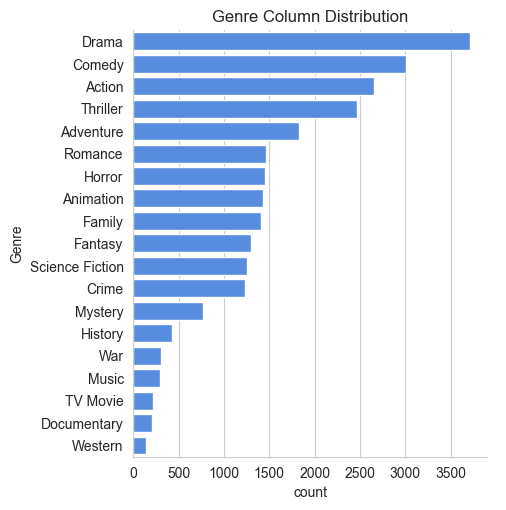

In [150]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Split the 'Genre' column into multiple rows
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Plot the count plot
sns.catplot(y='Genre', data=df_exploded, kind='count', 
            order=df_exploded['Genre'].value_counts().index, 
            color='#4287f5')

plt.title('Genre Column Distribution')
plt.show()


Which has highest votes in vote avg column ?

In [151]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


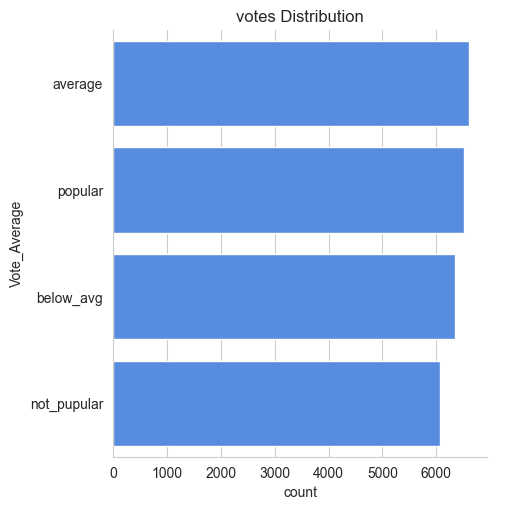

In [158]:
sns.catplot(y = 'Vote_Average', data=  df_exploded, kind= 'count',order= df_exploded['Vote_Average']
            .value_counts().index,
            color='#4287f5')
plt.title('votes Distribution')
plt. show()

What movie got the highest popularity ? What's its genre ?

In [159]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [160]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"


In [162]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9725,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"
9726,1984,Threads,13.354,186,popular,"War, Drama, Science Fiction"


Which year the most filmmed movies ?

<function matplotlib.pyplot.show(close=None, block=None)>

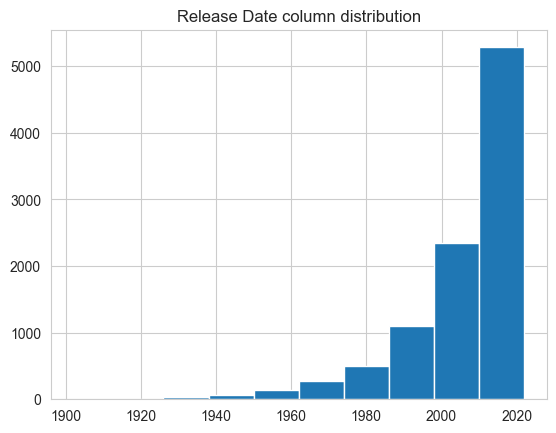

In [163]:
df['Release_Date'].hist()
plt.title("Release Date column distribution")
plt.show


*Conclusion*
- *Q1:* What is the most frequent genre in the dataset?
    - Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.
- *Q2:* What genres has highest votes?
    - we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% movies
- *Q3:* What movie got the highest popularity? what's its genre?
    - Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.
- *Q3:* What movie got the lowest popularity? what's its genre?
    - The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and his
- *Q4:* Which year has the most filmmed movies?
    - year 2020 has the highest filmming rate in our dataset.